# Busca tabu
Autores:                       
- Lucas Matheus Silva Pacheco  112686    
- Peter Mundadi                116338
- Gabriel Bitdinger Medeiros   118542

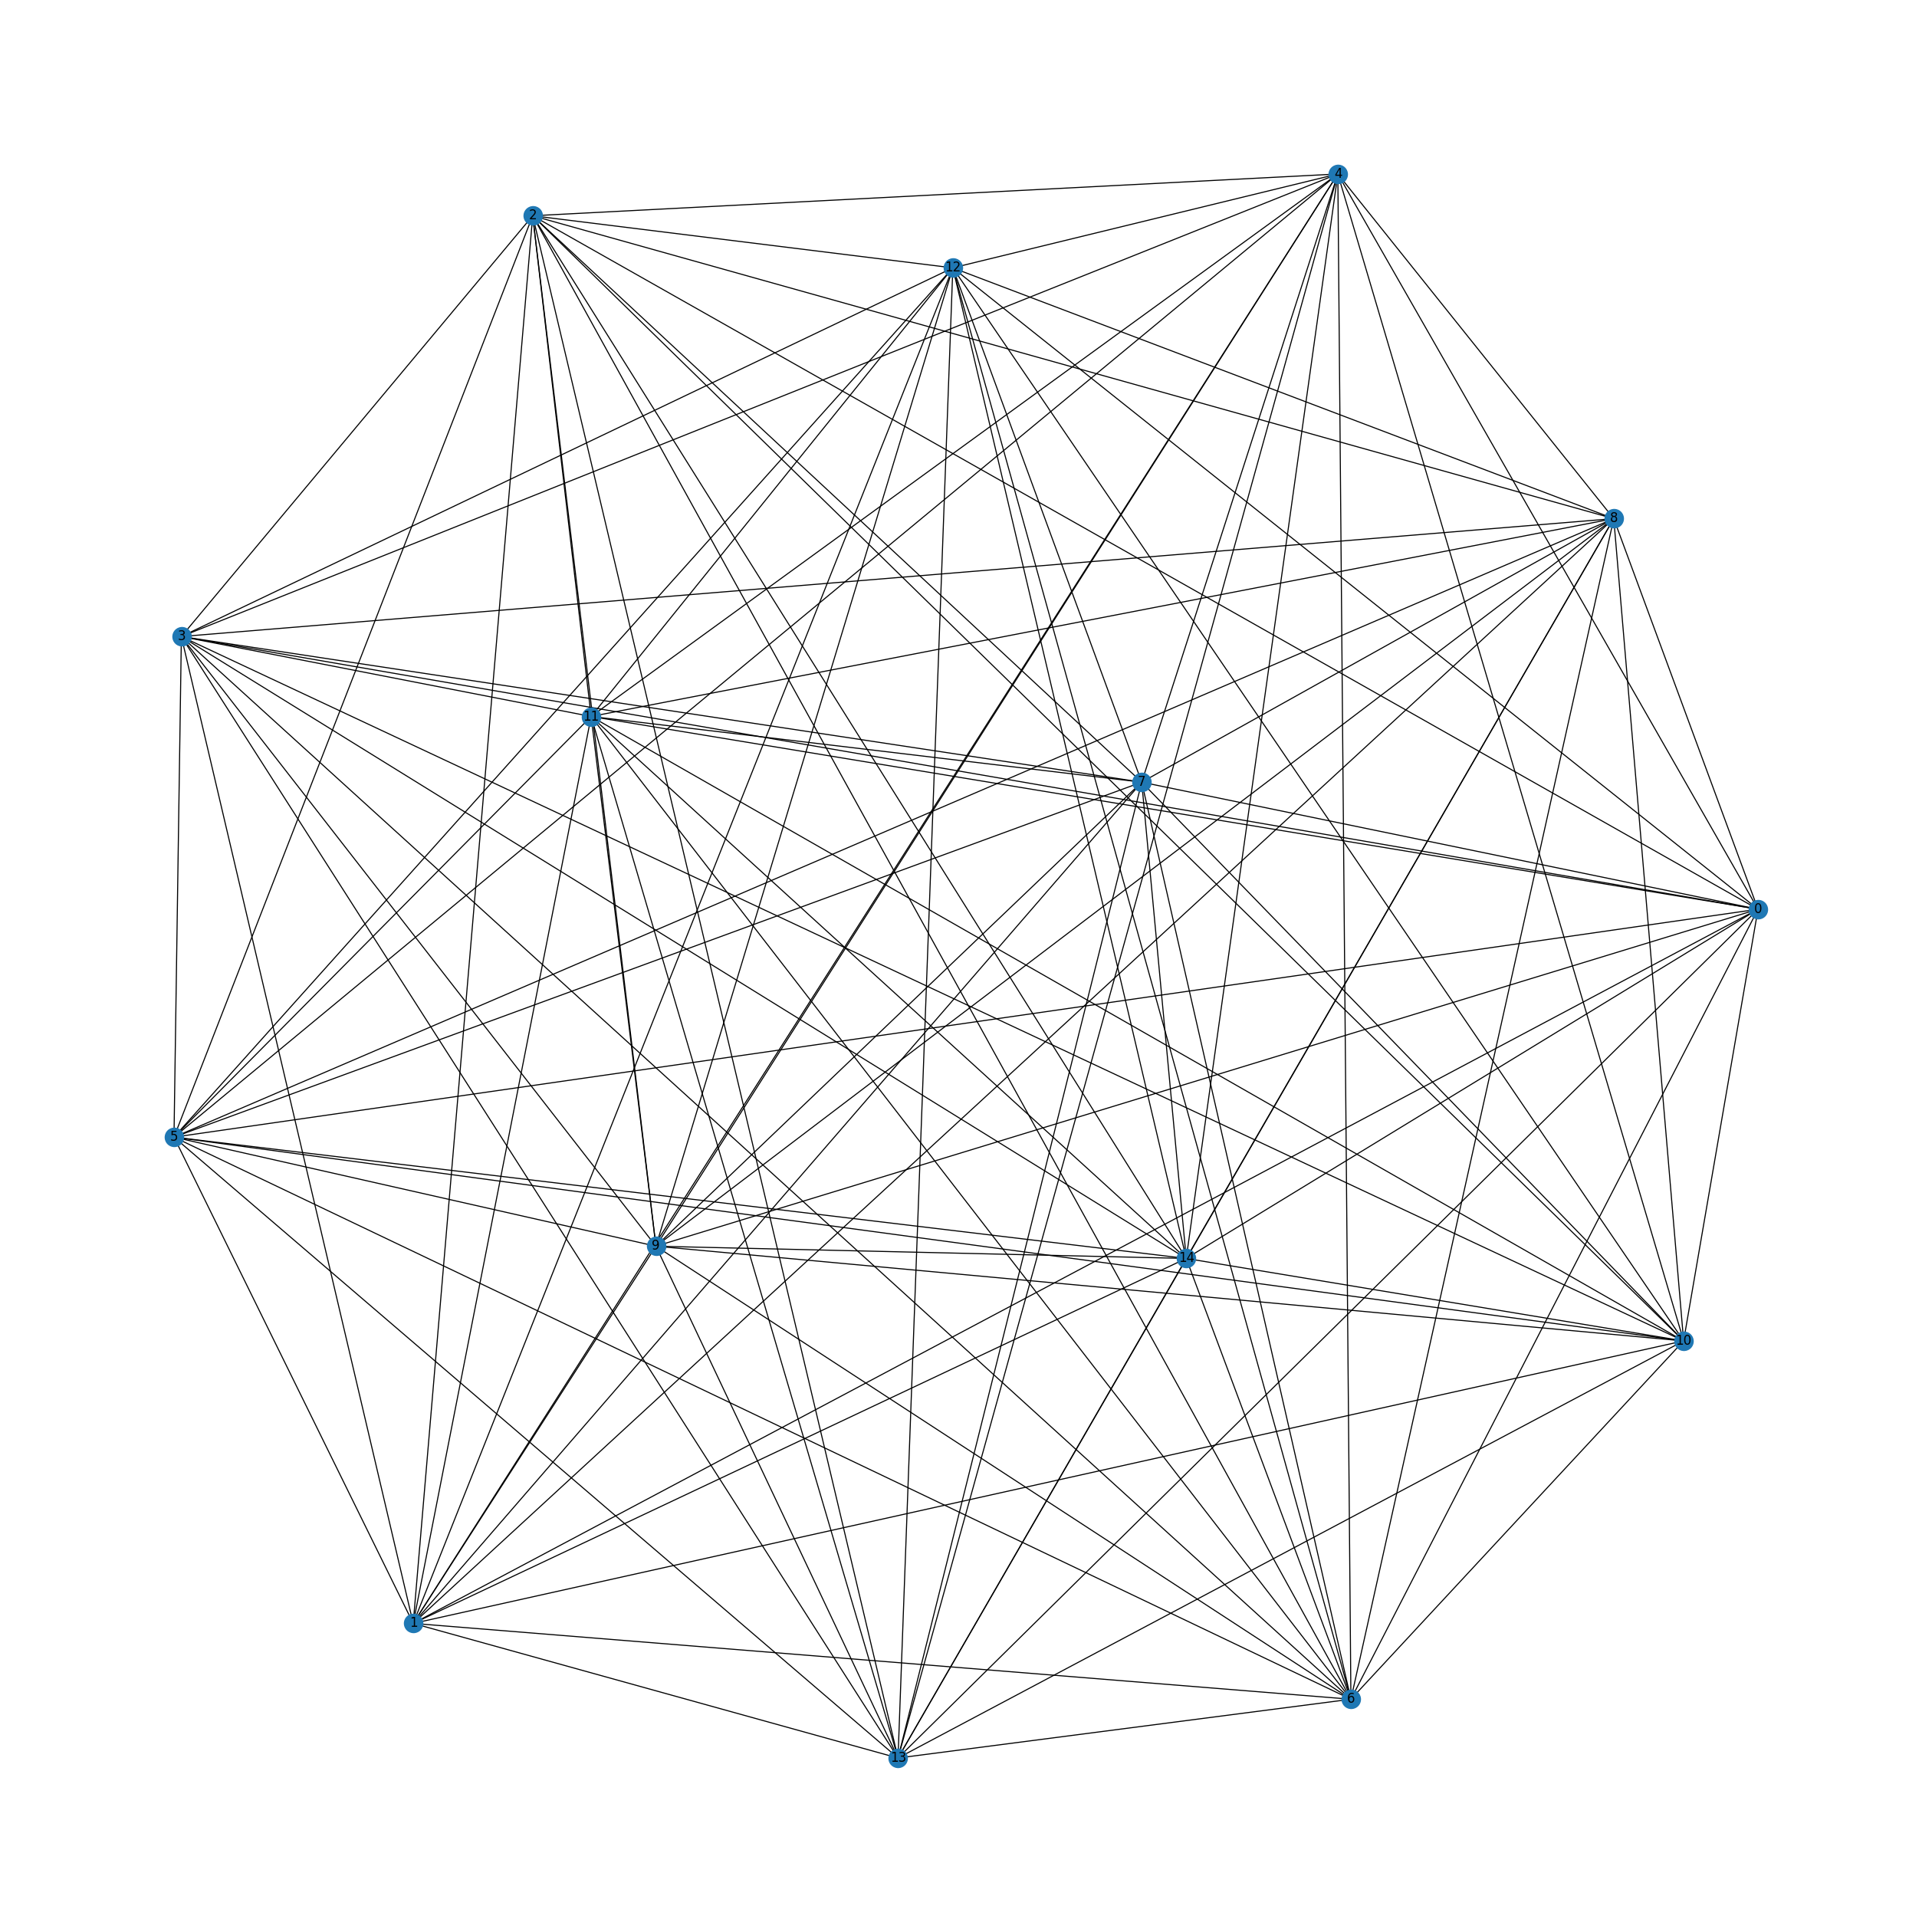

In [24]:
# Inicializa um grafo completo com 15 vértices
import networkx as nx
import random
import matplotlib.pyplot as plt
import math

G = nx.complete_graph(15)
for (u,v) in G.edges():
    G.edges[u,v]['peso'] = random.randint(0,10) # é atribuído um peso aleatório entre 0 e 10 para cada aresta do grafo.

plt.figure(figsize=(25,25))
nx.draw(G, with_labels=True)
plt.show()

As arestas representam as distâncias entre as cidades a serem visitadas pelo caixeiro viajante. Devemos encontrar o caminho mais curto 
que visita todas as cidades.

In [25]:
# Função que calcula o custo de uma viagem
def custo_viagem(G, viagem):
    custo = 0
    for u, v in zip(viagem, viagem[1:]):   # zip retorna pares de elementos da lista em cada iteração
        custo += G[u][v]["peso"]           # Para cada par consecutivo, a função acessa o peso da aresta correspondente no grafo e adiciona esse peso ao custo total da viagem
    custo += G[len(viagem) - 1][0]["peso"] # Adiciona o peso da aresta que liga o último vértice da viagem ao primeiro
    return custo 

In [26]:
def get_melhor_vizinho(G, viagem, historico_tabu, limite_tabu, aspiration):
    # inicializa variaveis 
    melhor_vizinho = None
    custo_melhor_vizinho = math.inf
    # gera lista de todos possiveis vizinhos
    # uma vizinhanca é só uma troca de dois vertices dentro de uma rota
    for i in range(len(G.nodes)):
        for j in range(len(G.nodes)):
            if i == j:
                continue

            # troca dois vertices
            rota_temp = viagem.copy()
            tmp = rota_temp[i]
            rota_temp[i] = rota_temp[j]
            rota_temp[j] = tmp
            custo_temp = custo_viagem(G, rota_temp)

            # verifica se a rota gerada é tabu
            if tuple(rota_temp) in historico_tabu:
                if historico_tabu[tuple(rota_temp)] > 0:
                    if historico_tabu[tuple(rota_temp)] > aspiration:
                        continue
                        
            # verifica se a rota gerada é melhor que a melhor rota encontrada até o momento
            if custo_temp < custo_melhor_vizinho:
                custo_melhor_vizinho = custo_temp
                melhor_vizinho = rota_temp
                historico_tabu[tuple(melhor_vizinho)] = limite_tabu

    return melhor_vizinho

In [27]:
# Função que executa o algoritmo de busca tabu
def busca_tabu(G, solucao_inicial, num_iter, historico_tabu, limite_tabu, aspiration, funcao_custo, funcao_vizinho):
    melhor_solucao = solucao_inicial
    melhor_hist = melhor_solucao
    custo_melhor_hist = funcao_custo(G,melhor_hist)
    melhor_custo = funcao_custo(G, melhor_solucao) 
    estados = [melhor_custo]
    
    # executa o algoritmo num_iter vezes 
    for _ in range(num_iter):
        for x in historico_tabu:
            historico_tabu[x] -= 1
        historico_tabu = {x: historico_tabu[x] for x in historico_tabu if historico_tabu[x] > 0}
        
        melhor_solucao = funcao_vizinho( G, melhor_solucao, historico_tabu, limite_tabu, aspiration)

        melhor_custo = funcao_custo(G, melhor_solucao)
        
        if melhor_custo <= custo_melhor_hist: 
            melhor_hist = melhor_solucao
            custo_melhor_hist = melhor_custo
        estados.append(melhor_custo)

    return melhor_solucao, melhor_custo, estados

Solucao Inicial: [1, 10, 0, 8, 7, 6, 3, 14, 9, 12, 2, 4, 5, 13, 11]
Custo Inicial: 88
Melhor Solucao: [7, 8, 1, 0, 3, 9, 11, 14, 6, 12, 4, 2, 5, 13, 10]
Melhor custo: 26


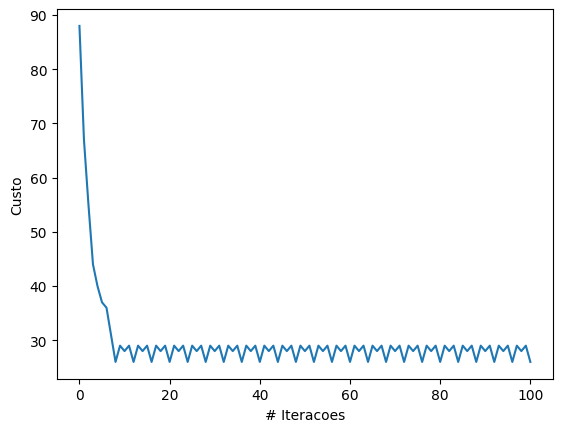

In [28]:
aspiration = 2
historico_tabu = {}
num_inter = 100
limite_tabu = 5

# inicializa uma solução inicial aleatória
solucao_inicial = [*G.nodes()]
random.shuffle(solucao_inicial)
custo_inicial = custo_viagem(G, solucao_inicial)
print(f"Solucao Inicial: {solucao_inicial}")
print(f"Custo Inicial: {custo_inicial}")

melhor_solucao, melhor_custo, estados = busca_tabu(G, 
                                              solucao_inicial, num_inter, historico_tabu, limite_tabu, aspiration, 
                                              custo_viagem, get_melhor_vizinho)
print(f"Melhor Solucao: {melhor_solucao}")
print(f"Melhor custo: {melhor_custo}")
plt.xlabel("# Iteracoes")
plt.ylabel("Custo")
plt.plot(estados)
plt.show()

Imprimimos na tela a solução inicial gerada e o seu custo, além de executar a busca tabu e imprimir a melhor solução encontrada e seu respectivo custo. Por fim, um gráfico é gerado mostrando a evolução do custo ao longo das iterações.